# US Flights - Data Expo 2009
## by Mohamed Ramadan

## Preliminary Wrangling

> The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed. 
>
> As the data is huge, I decided to explore the period from 2007 to 2008

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import missingno  as msno
import datetime
from scipy.spatial.distance import cdist
import datetime

import warnings
warnings.simplefilter(action='ignore')

# display all columns
pd.set_option('display.max_columns', 500)

%matplotlib inline

> ##### Load in the dataset

In [2]:
# interrogate file names and path covring the period from 2007 to 2008
folder_name = '../Project Template/'
files = glob.glob(os.path.join(folder_name, "200*.csv"))

In [3]:
# dataframes concatenation
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)  

In [4]:
# display data
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6.0,9.0,0,NaN,0,3.0,0.0,0.0,0.0,31.0
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3.0,8.0,0,NaN,0,23.0,0.0,0.0,0.0,3.0
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [5]:
# check dataframe shape
df.shape

(14462943, 29)

In [6]:
# check duplicated rows`
df.duplicated().sum()

31

Remove duplicated rows in the dataset

In [7]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [8]:
# reset index
df.reset_index(inplace=True, drop=True)

In [9]:
#Check missing values
df.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                296994
CRSDepTime                  0
ArrTime                329576
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 83387
ActualElapsedTime      332626
CRSElapsedTime           1838
AirTime                332626
ArrDelay               332626
DepDelay               296994
Origin                      0
Dest                        0
Distance                    0
TaxiIn                 151649
TaxiOut                137058
Cancelled                   0
CancellationCode     14164729
Diverted                    0
CarrierDelay          5484991
WeatherDelay          5484991
NASDelay              5484991
SecurityDelay         5484991
LateAircraftDelay     5484991
dtype: int64

To deal with missing values,  
Let's first check the consistancy of the cancelled fights information

In [10]:
# Check missing values in case of cancelled flights
df[df['Cancelled'] == 1].isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              296994
CRSDepTime                0
ArrTime              298182
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum               83380
ActualElapsedTime    298182
CRSElapsedTime          513
AirTime              298182
ArrDelay             298182
DepDelay             296994
Origin                    0
Dest                      0
Distance                  0
TaxiIn               137434
TaxiOut              137058
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         137434
WeatherDelay         137434
NASDelay             137434
SecurityDelay        137434
LateAircraftDelay    137434
dtype: int64

In [11]:
# remove rows with missing values in CRSElapsedTime 
df[df['Cancelled'] == 1] = df[df['Cancelled'] == 1].dropna(subset=['CRSElapsedTime'])

# reset index
df.reset_index(inplace=True, drop=True)

In [12]:
# check missing values in dataframe-cancelled flights
df[df['Cancelled'] == 1].isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              296481
CRSDepTime                0
ArrTime              297669
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum               83379
ActualElapsedTime    297669
CRSElapsedTime            0
AirTime              297669
ArrDelay             297669
DepDelay             296481
Origin                    0
Dest                      0
Distance                  0
TaxiIn               137188
TaxiOut              136812
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         137188
WeatherDelay         137188
NASDelay             137188
SecurityDelay        137188
LateAircraftDelay    137188
dtype: int64

TailNum column is holding a lot of missing and correpted information beside it won't be useful for my exploration thus, I decided to remove it from the dataframe. Also, TaxiIn and TaxiOut are irrelevant to my analysis.

Also, I will impute a value of zero in columns with missing values for cancelled flights as it is irrelevant to have a value other than zero in this case.

In [13]:
# drop columns TailNum, TaxiIn, TaxiOu
df.drop(columns=['TailNum', 'TaxiIn', 'TaxiOut'], inplace=True)

In [14]:
# imputing zero value
df[df['Cancelled'] == 1] = df[df['Cancelled'] == 1].fillna(0)

In [15]:
# check total missing values in cancelled flights
df[df['Cancelled'] == 1].isnull().sum().sum()

0

Second, after solving cancelled flights missing values, I will focus on the remaining flights.

In [16]:
# check missing values in dataframe
df.isnull().sum()

Year                      513
Month                     513
DayofMonth                513
DayOfWeek                 513
DepTime                   513
CRSDepTime                513
ArrTime                 31907
CRSArrTime                513
UniqueCarrier             513
FlightNum                 513
ActualElapsedTime       34957
CRSElapsedTime           1838
AirTime                 34957
ArrDelay                34957
DepDelay                  513
Origin                    513
Dest                      513
Distance                  513
Cancelled                 513
CancellationCode     14165242
Diverted                  513
CarrierDelay          5348070
WeatherDelay          5348070
NASDelay              5348070
SecurityDelay         5348070
LateAircraftDelay     5348070
dtype: int64

In [17]:
# display rows with all NaNs
df[df.Year.isnull()].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
745083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on above, I will remove rows with missing values at all columns.

In [18]:
# remove rows with missing values at all columns
df.dropna(subset=['Year'], inplace=True)

# reset index
df.reset_index(inplace=True, drop=True)

In [19]:
# check missing values in the dataframe
df.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                 31394
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
ActualElapsedTime       34444
CRSElapsedTime           1325
AirTime                 34444
ArrDelay                34444
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
Cancelled                   0
CancellationCode     14164729
Diverted                    0
CarrierDelay          5347557
WeatherDelay          5347557
NASDelay              5347557
SecurityDelay         5347557
LateAircraftDelay     5347557
dtype: int64

In [20]:
# check missing values for diverted flights
df[df.Diverted == 1].isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime              31394
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
ActualElapsedTime    34444
CRSElapsedTime        1325
AirTime              34444
ArrDelay             34444
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
Cancelled                0
CancellationCode     34444
Diverted                 0
CarrierDelay         17265
WeatherDelay         17265
NASDelay             17265
SecurityDelay        17265
LateAircraftDelay    17265
dtype: int64

In [21]:
# ActualElapsedTime value counts in case of diverted flights
df[df.Diverted == 1].ActualElapsedTime.value_counts(dropna=False)

NaN    34444
Name: ActualElapsedTime, dtype: int64

In [22]:
# AirTime value counts in case of diverted flights
df[df.Diverted == 1].AirTime.value_counts(dropna=False)

NaN    34444
Name: AirTime, dtype: int64

In [23]:
# ArrDelay value counts in case of diverted flights
df[df.Diverted == 1].ArrDelay.value_counts(dropna=False)

NaN    34444
Name: ArrDelay, dtype: int64

In [24]:
# CarrierDelay value counts in case of diverted flights
df[df.Diverted == 1].CarrierDelay.value_counts(dropna=False)

NaN    17265
0.0    17179
Name: CarrierDelay, dtype: int64

In case of diverted flights, values in the below columns are irrelevant hence, I decided to impute missing values in those columns with Zero.  

ActualElapsedTime, AirTime, ArrDelay, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, ArrTime, CRSElapsedTime.

I won't use any of the above columns when analyzing diverted flights

In [25]:
# imputing zero value
df.loc[
    (df.Diverted == 1), 
    [
        'ActualElapsedTime', 
        'AirTime', 'ArrDelay', 
        'CarrierDelay', 
        'WeatherDelay', 
        'NASDelay', 
        'SecurityDelay', 
        'LateAircraftDelay',
        'ArrTime',
        'CRSElapsedTime'
    ]
    ] = \
df.loc[
    (df.Diverted == 1), 
    ['ActualElapsedTime',
     'AirTime', 'ArrDelay', 
     'CarrierDelay', 
     'WeatherDelay', 
     'NASDelay', 
     'SecurityDelay', 
     'LateAircraftDelay',
     'ArrTime',
     'CRSElapsedTime']
].fillna(0)

In [26]:
df[df.Diverted == 1].isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
Cancelled                0
CancellationCode     34444
Diverted                 0
CarrierDelay             0
WeatherDelay             0
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
dtype: int64

In [27]:
df.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                     0
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
Cancelled                   0
CancellationCode     14164729
Diverted                    0
CarrierDelay          5330292
WeatherDelay          5330292
NASDelay              5330292
SecurityDelay         5330292
LateAircraftDelay     5330292
dtype: int64

As CancellationCode is irrelevant in case of operated flights, I will imput "NA" in this case.

In [28]:
# impute NA in CancellationCode of the operated flights
df['CancellationCode'] = df['CancellationCode'].fillna('NA')

In [29]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
Cancelled                  0
CancellationCode           0
Diverted                   0
CarrierDelay         5330292
WeatherDelay         5330292
NASDelay             5330292
SecurityDelay        5330292
LateAircraftDelay    5330292
dtype: int64

From the data, I have learned the below formula

DepDelay = CarrierDelay + WeatherDelay + SecurityDelay + LateAircraftDelay  
ArrDelay = NASDelay + DepDelay

if DepDelay is negative or zero, then: 

    CarrierDelay = WeatherDelay = SecurityDelay = LateAircraftDelay = Zero  
    if ArrDelay is negative or zero, then:  
       NASDelay = Zero  
    else, if ArrDelay is positive, then (Most of the time):  
       NASDelay = ArrDelay  
    

Then, Let's deal with the flights with DepDelay less or equal to zero.

In [30]:
# impute zero to CarrierDelay + WeatherDelay + SecurityDelay + LateAircraftDelay for DepDelay <= Zero
df.loc[
    ((df['DepDelay'] <= 0)),
    ['CarrierDelay',
     'WeatherDelay',
     'SecurityDelay',
     'LateAircraftDelay'
    ]] = \
df.loc[
    ((df['DepDelay'] <= 0)),
    ['CarrierDelay',
     'WeatherDelay',
     'SecurityDelay',
     'LateAircraftDelay'
    ]].fillna(0)

In [31]:
# impute zero to NASDelay for DepDelay <= 0 and ArrDelay <= 0
df.loc[
    ((df['DepDelay'] <= 0) & (df['ArrDelay'] <= 0)),
    ['NASDelay'
    ]] = \
df.loc[
    ((df['DepDelay'] <= 0) & (df['ArrDelay'] <= 0)),
    ['NASDelay'
    ]].fillna(0)

In [32]:
# impute ArrDelay value to NASDelay for DepDelay <= 0 and ArrDelay > 0
df.loc[
    ((df['DepDelay'] <= 0) & (df['ArrDelay'] > 0)),
    ['NASDelay'
    ]] = \
df.loc[
    ((df['DepDelay'] <= 0) & (df['ArrDelay'] > 0)),
    ['NASDelay'
    ]].apply(lambda x: x.fillna(df['ArrDelay']))

In [33]:
# confirm the above imputation
df[(df['DepDelay'] <= 0) & (df['ArrDelay'] > 0)].tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
14462386,2008.0,12.0,13.0,6.0,848.0,850.0,1024.0,1005.0,DL,1628.0,156.0,135.0,108.0,19.0,-2.0,ATL,MCI,692.0,0.0,NA,0.0,0.0,0.0,19.0,0.0,0.0
14462390,2008.0,12.0,13.0,6.0,638.0,640.0,808.0,753.0,DL,1632.0,90.0,73.0,50.0,15.0,-2.0,JAX,ATL,270.0,0.0,NA,0.0,0.0,0.0,15.0,0.0,0.0
14462391,2008.0,12.0,13.0,6.0,756.0,800.0,1032.0,1026.0,DL,1633.0,96.0,86.0,56.0,6.0,-4.0,MSY,ATL,425.0,0.0,NA,0.0,0.0,0.0,6.0,0.0,0.0
14462392,2008.0,12.0,13.0,6.0,612.0,615.0,923.0,907.0,DL,1635.0,131.0,112.0,103.0,16.0,-3.0,GEG,SLC,546.0,0.0,NA,0.0,0.0,0.0,16.0,0.0,0.0
14462393,2008.0,12.0,13.0,6.0,749.0,750.0,901.0,859.0,DL,1636.0,72.0,69.0,41.0,2.0,-1.0,SAV,ATL,215.0,0.0,NA,0.0,0.0,0.0,2.0,0.0,0.0


In [34]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
Cancelled                  0
CancellationCode           0
Diverted                   0
CarrierDelay         1368987
WeatherDelay         1368987
NASDelay             1368987
SecurityDelay        1368987
LateAircraftDelay    1368987
dtype: int64

I will use linear interpolation for the remaining columns with missing values

In [35]:
# Null values imputation using interpolation
df['CarrierDelay'] = df['CarrierDelay'].interpolate(method='linear', limit_direction ='both', axis=0) 
df['WeatherDelay'] = df['WeatherDelay'].interpolate(method='linear', limit_direction ='both', axis=0) 
df['NASDelay'] = df['NASDelay'].interpolate(method='linear', limit_direction ='both', axis=0) 
df['SecurityDelay'] = df['SecurityDelay'].interpolate(method='linear', limit_direction ='both', axis=0)
df['LateAircraftDelay'] = df['LateAircraftDelay'].interpolate(method='linear', limit_direction ='both', axis=0)

In [36]:
# recheck total NaN values
df.isnull().sum().sum()

0

In [37]:
# numerical columns
numerical_col = [col for col in df.columns if df[col].dtype != 'object']

# categorical columns
categorical_col = [col for col in df.columns if df[col].dtype == 'object']

In [38]:
# convert numerical col type from float to integer
# This would reduce memory consumption
df[numerical_col] = df[numerical_col].astype(int)

In [39]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232,1225,1341,1340,WN,2891,69,75,54,1,7,SMF,ONT,389,0,NA,0,0,0,0,0,0
1,2007,1,1,1,1918,1905,2043,2035,WN,462,85,90,74,8,13,SMF,PDX,479,0,NA,0,0,0,0,0,0
2,2007,1,1,1,2206,2130,2334,2300,WN,1229,88,90,73,34,36,SMF,PDX,479,0,NA,0,3,0,0,0,31
3,2007,1,1,1,1230,1200,1356,1330,WN,1355,86,90,75,26,30,SMF,PDX,479,0,NA,0,23,0,0,0,3
4,2007,1,1,1,831,830,957,1000,WN,2278,86,90,74,-3,1,SMF,PDX,479,0,NA,0,0,0,0,0,0


In the below steps, I am going to covert time columns to a time format and creat and new column holding the date

In [40]:
# time columns
time_col = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

In [41]:
# Function that convert the 'HHMM' string to datetime.time
def format_time(series):
    """
    A function that covert time series to a proper time format"""
    
    if pd.isnull(series):
        return np.nan
    else:
        if series == 2400: series = 0
        series = "{0:04d}".format(int(series))
        time = datetime.time(int(series[0:2]), int(series[2:4]))
        return time

In [42]:
# Apply above function to the time columns
for col in time_col:
    df[col] = df[col].apply(format_time)

In [43]:
# create date column
temp = pd.DataFrame()
temp[['Year', 'Month', 'Day']] = df[['Year', 'Month', 'DayofMonth']]
df['date'] = pd.to_datetime(temp[['Year', 'Month', 'Day']])

In [44]:
# create a clean copy
flights = df.copy()

In [45]:
# clean dataset shape
print("The shape of the dataset targeted for the study is {}".format(flights.shape))

The shape of the dataset targeted for the study is (14462399, 27)


In [46]:
# data types
flights.dtypes

Year                          int32
Month                         int32
DayofMonth                    int32
DayOfWeek                     int32
DepTime                      object
CRSDepTime                   object
ArrTime                      object
CRSArrTime                   object
UniqueCarrier                object
FlightNum                     int32
ActualElapsedTime             int32
CRSElapsedTime                int32
AirTime                       int32
ArrDelay                      int32
DepDelay                      int32
Origin                       object
Dest                         object
Distance                      int32
Cancelled                     int32
CancellationCode             object
Diverted                      int32
CarrierDelay                  int32
WeatherDelay                  int32
NASDelay                      int32
SecurityDelay                 int32
LateAircraftDelay             int32
date                 datetime64[ns]
dtype: object

### What is the structure of your dataset?

> The original dataset contains nearly 120 milion rows and 29 columns. It covers flight departure and arrival in the period between 1987 to 2008. Because of the computational challenge, I have worked on a subset of the dataset which is covering 2007 and 2008. After cleaning the dataset subset, it consists of 14,462,399 rows and 27 columns from which 8 columns are categorical, 18 are numerical and 1 datetime columns.


### What is/are the main feature(s) of interest in your dataset?

> * ActualElapsedTime           
> * CRSElapsedTime                
> * AirTime                       
> * ArrDelay                      
> * DepDelay  
> * Distance        
> * Cancelled       
> * CancellationCode

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> * Year
> * Month
> * Origin           
> * Dest             
> * Diverted         
> * CarrierDelay     
> * WeatherDelay     
> * NASDelay         
> * SecurityDelay    
> * LateAircraftDelay
> * date             

As 14.5 million rows is still challenging to be work on with the conventional ways, I have decided/obliged to work on a sample of the data. I think 10 % sample of the observation wouldn't be a bad decision.

In [47]:
# generate a random sample
flights_sample = flights.sample(int(0.1 * flights.shape[0]), 
                                replace=False, 
                                random_state=42).sort_index().reset_index(drop=True)

In [48]:
flights_sample.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date
0,2007,1,1,1,22:06:00,21:30:00,23:34:00,23:00:00,WN,1229,88,90,73,34,36,SMF,PDX,479,0,NA,0,3,0,0,0,31,2007-01-01
1,2007,1,1,1,21:28:00,20:35:00,22:45:00,22:00:00,WN,139,77,85,66,45,53,SMF,SAN,480,0,NA,0,0,0,3,0,42,2007-01-01
2,2007,1,1,1,13:45:00,13:45:00,14:56:00,15:10:00,WN,2643,71,85,62,-14,0,SMF,SAN,480,0,NA,0,0,0,0,0,0,2007-01-01
3,2007,1,1,1,10:45:00,10:35:00,12:40:00,12:25:00,WN,1502,115,110,104,15,10,SMF,SEA,605,0,NA,0,6,0,5,0,4,2007-01-01
4,2007,1,1,1,17:37:00,16:45:00,19:46:00,18:55:00,WN,212,69,70,55,51,52,SNA,PHX,338,0,NA,0,20,0,0,0,31,2007-01-01


## Univariate Exploration

##### Does the proportion of flights during 2008 is higher or lower than flights during 2007?

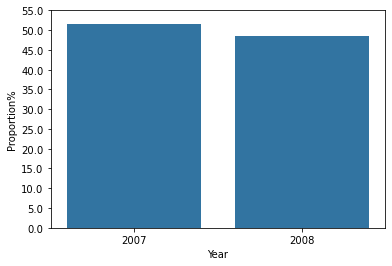

In [49]:
# define a base color (blue) to be used in the graph
base_color = sb.color_palette()[0]

# define proportion tick values and names
n_flights = flights_sample.shape[0]
max_year_prop = flights_sample.Year.value_counts().iloc[0] / n_flights
tick_props = np.arange(0, max_year_prop + 0.05, 0.05)
tick_names = ['{:0.1f}'.format(100 * v) for v in tick_props]

# plot a count plot
sb.countplot(data=flights_sample, x='Year', color=base_color)

# Change tick locations and labels
plt.yticks(tick_props * n_flights, tick_names)

# define x label
plt.ylabel('Proportion%');

There is an obvious slight decrease in the proportion of flights during 2008 compared to flights during 2007

##### What are the top 5 Carriers wrt proportion of flights during 2007-2008?

I have got carrier names from [Bureau of Transportation Statistics](https://www.transtats.bts.gov/DL_SelectFields.asp?gnoyr_VQ=FMF&QO_fu146_anzr=Nv4%20Pn44vr45)

In [50]:
# read carriers information
carriers = pd.read_csv('L_UNIQUE_CARRIERS.csv')
carriers.rename(columns={'Code':'UniqueCode', 'Description':'CarrierName'}, inplace=True)
carriers.head()

,UniqueCode,CarrierName
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [51]:
# merge flights dataframe with carrier info dataframe
flights_sample = pd.merge(left=flights_sample, right=carriers, how='left', left_on='UniqueCarrier', right_on='UniqueCode')

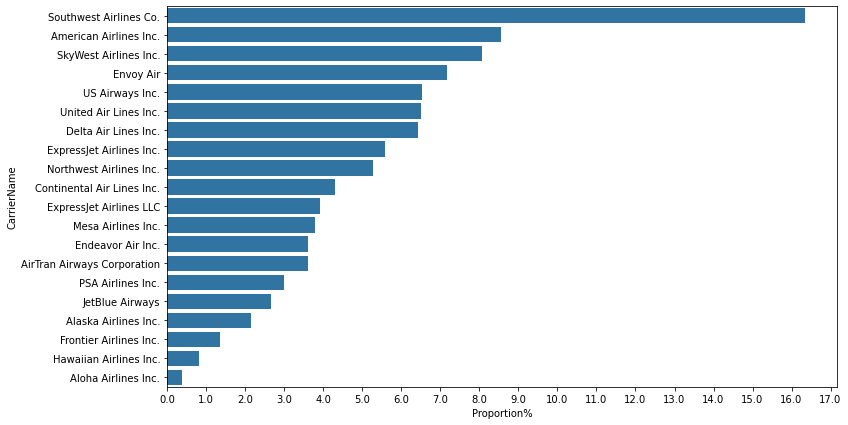

In [52]:
# define proportion tick values and names
n_flights = flights_sample.shape[0]
max_carrier_prop = flights_sample.CarrierName.value_counts().iloc[0] / n_flights
xtick_props = np.arange(0, max_carrier_prop + 0.01, 0.01)
xtick_names = ['{:0.1f}'.format(100 *v) for v in xtick_props]

# set figure size
plt.figure(figsize=(12,7))

# plot a count plot
sb.countplot(
    data=flights_sample, 
    y='CarrierName', 
    color=base_color, 
    order=flights_sample.CarrierName.value_counts().index)

# Change tick locations and labels
plt.xticks(xtick_props * n_flights, xtick_names)

# define xlabel
plt.xlabel('Proportion%');

We can see that top five carriers are:  
1. Southwest Airlines Co.(WN)
2. American Airlines Inc.(AA)
3. SkyWest Airlines Inc. (OO)
4. Envoy Air (MQ)
5. US Airways Inc.(US)
  
Interestingly, Southwest Airlines number of flights is almost doubled compared to American Airlines which comes in the second rank.

##### What is the percentage of  cancelled flights compared to the operated ones?

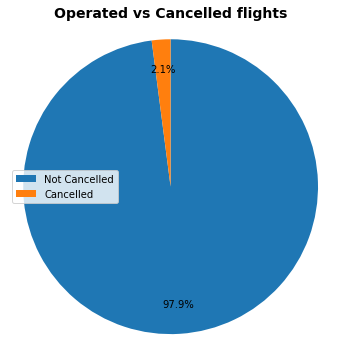

In [53]:
# calculate sorted counts
sorted_counts = flights_sample.Cancelled.value_counts()

# plot a pie chart
labels=['Not Cancelled', 'Cancelled']
plt.figure(figsize=(6,6))
plt.pie(sorted_counts,  
        startangle=90, 
        counterclock=False, 
        autopct='%1.1f%%', 
        pctdistance=0.8)
plt.axis('square')
plt.title('Operated vs Cancelled flights', size=14, weight='bold')
plt.legend(loc=6,labels=labels);


From above chart, we can see that 97.9% of flights were operated while only 2.1% of flights were cancelled.

#### What is the most common reason for flights cancellation?

In [54]:
# fliter cancelled flights
cancelled_flights_s = flights_sample.query('Cancelled==1')

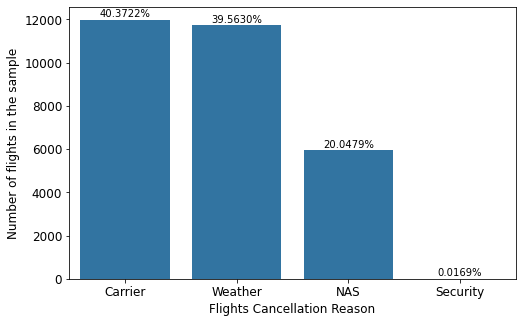

In [55]:
# set figure size
plt.figure(figsize=(8,5))

# plot a count graph
ax = sb.countplot(
        data=cancelled_flights_s, 
        x='CancellationCode', 
        color=base_color, 
        order=cancelled_flights_s.CancellationCode.value_counts().index)

# set x axis ticks and labels
plt.xticks(size=12)
plt.xlabel('Flights Cancellation Reason', size=12)
ax.set_xticklabels(['Carrier', 'Weather', 'NAS', 'Security'])

# set y axis tickes and labels
plt.yticks(size=12)
plt.ylabel('Number of flights in the sample', size=12)

# print percentage on the bars
n_flights_cancelled = cancelled_flights_s.shape[0]

for p in ax.patches:
    percentage = f'{100 * p.get_height() / n_flights_cancelled:.4f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show();


The most common reason for flights cancellation is Carrier 40.4% of the time followed be Weather with a percent of 39.5%

##### What is the percentage of  diverted flights compared to the non-diverted ones?

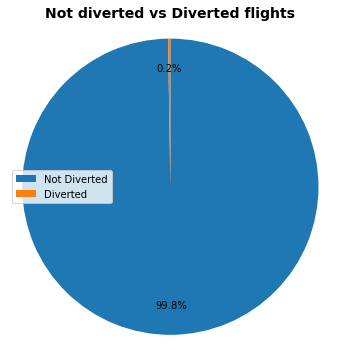

In [56]:
# calculate sorted counts
sorted_counts = flights_sample.Diverted.value_counts()

# plot a pie chart
labels=['Not Diverted', 'Diverted']
plt.figure(figsize=(6,6))
plt.pie(sorted_counts,  
        startangle=90, 
        counterclock=False, 
        autopct='%1.1f%%', 
        pctdistance=0.8)
plt.axis('square')
plt.title('Not diverted vs Diverted flights', size=14, weight='bold')
plt.legend(loc=6,labels=labels);

From above pie graph, diverted flights percent is very small (0.2 %) compared to non-diverted fligths

##### Let's plot numerical features distributions

ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Distance

For a vaild an consistent output, above features should be visualized for operated and non-diverted flights only.

In [57]:
# fliter opertated (not cancelled) and non-diverted flights
flights_opt_s = flights_sample.query('(Cancelled == 0) & (Diverted == 0)')

In [58]:
# define a function to plot distribuitons and boxplot
def plot_distrib_flight(col, bins, xlim=None, xtrans=None):
    """The function is plotting histogram distirbution and box plots for flight dataset
    """
    # create figure
    plt.figure(figsize=(12,5))

    # plot histogram and boxplot graphs for called feature
    plt.subplot(1,2,1)
    sb.histplot(flights_opt_s[col],color=base_color,bins=bins)
    if xlim != None:
        plt.xlim(xlim)
    if xtrans != None:
        plt.xscale(xtrans)
    plt.subplot(1,2,2)
    sb.boxplot(flights_opt_s[col],color=base_color);

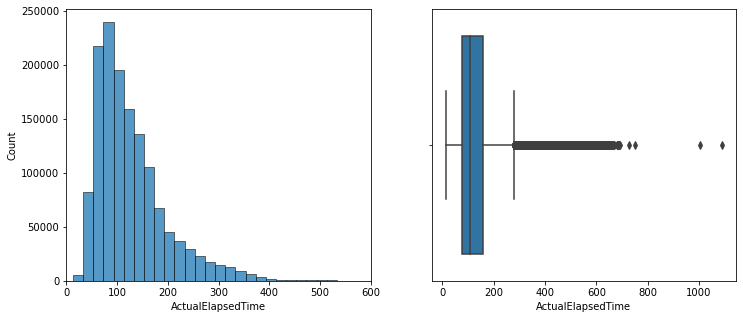

In [59]:
# plot histogram and boxplot graphs for ActualElapsedTime
bins = np.arange(flights_opt_s['ActualElapsedTime'].min(),flights_opt_s['ActualElapsedTime'].max(),20)
plot_distrib_flight('ActualElapsedTime', bins,xlim=(0,600))

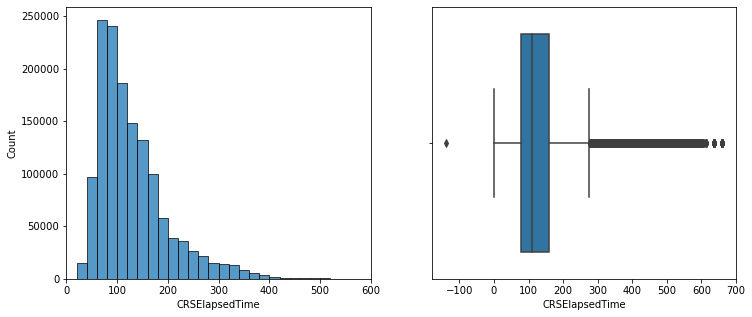

In [60]:
# plot histogram and boxplot graphs for CRSElapsedTime
bins = np.arange(flights_opt_s['CRSElapsedTime'].min(),flights_opt_s['CRSElapsedTime'].max()+20,20)
plot_distrib_flight('CRSElapsedTime',bins,xlim=(0,600))

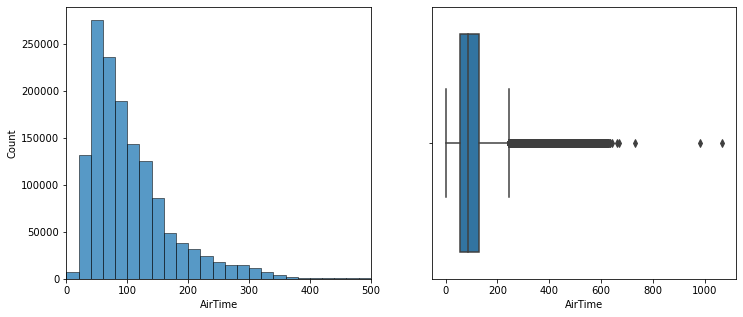

In [61]:
# plot histogram and boxplot graphs for AirTime
bins = np.arange(flights_opt_s['AirTime'].min(),flights_opt_s['AirTime'].max()+20,20)
plot_distrib_flight('AirTime',bins,xlim=(0,500))

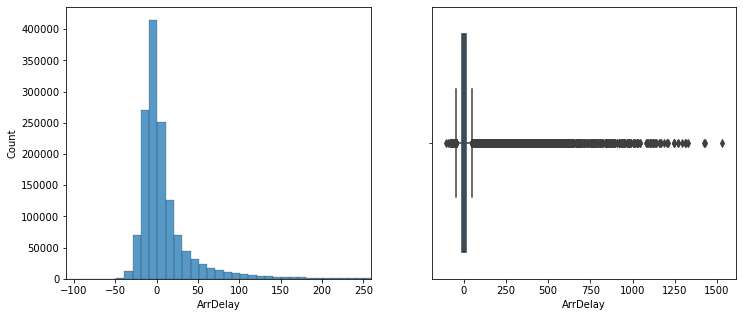

In [62]:
# plot histogram and boxplot graphs for ArrDelay
bins = np.arange(flights_opt_s['ArrDelay'].min(),flights_opt_s['ArrDelay'].max(),10)
plot_distrib_flight(
    'ArrDelay',
    bins,
    xlim=(flights_opt_s['ArrDelay'].min() , np.absolute(flights_opt_s['ArrDelay'].min())+150))

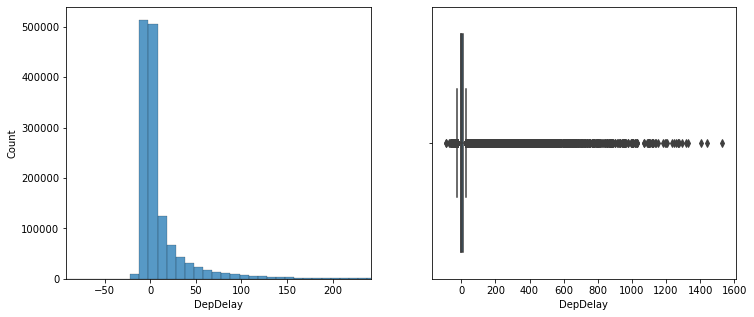

In [63]:
# plot histogram and boxplot graphs for DepDelay
bins = np.arange(flights_opt_s['DepDelay'].min(),flights_opt_s['DepDelay'].max(),10)
plot_distrib_flight(
    'DepDelay',
    bins,
    xlim=(flights_opt_s['DepDelay'].min() , np.absolute(flights_opt_s['DepDelay'].min())+150))

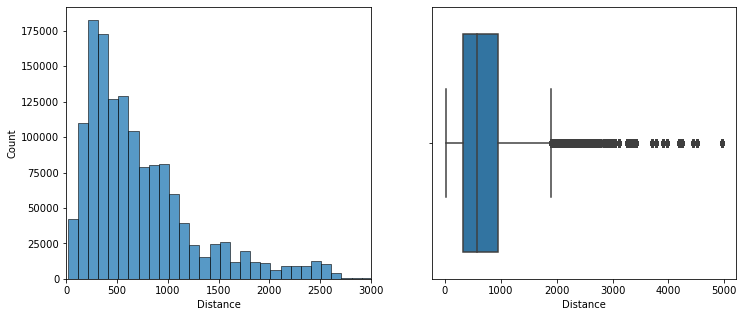

In [64]:
# plot histogram and boxplot graphs for Distance
bins = np.arange(flights_opt_s['Distance'].min(),flights_opt_s['Distance'].max(),100)
plot_distrib_flight('Distance',bins,xlim=(0,3000))

All above features distributions are right-skewed with a lot of outliers. I have applied limits on x axis to take a closer look at the underlying patterns in the data.  

I have noticed that there are negative values in the estimated elapsed time `CRSElapsedTime` which is not correct.  
Let's check this observation

In [65]:
# show CRSElapsed range
flights_opt_s.CRSElapsedTime.describe()

count    1.413071e+06
mean     1.282824e+02
std      7.006447e+01
min     -1.400000e+02
25%      7.900000e+01
50%      1.100000e+02
75%      1.580000e+02
max      6.600000e+02
Name: CRSElapsedTime, dtype: float64

In [66]:
# check records with negative values in CRSElapsedTime
flights_opt_s.query('CRSElapsedTime < 0')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date,UniqueCode,CarrierName
1144717,2008,7,29,2,13:23:00,13:30:00,13:56:00,11:10:00,HA,165,33,-140,23,166,-7,OGG,HNL,100,0,NA,0,166,0,0,0,0,2008-07-29,HA,Hawaiian Airlines Inc.


I decided to remove this row

In [67]:
# remove the corrupted row
flights_opt_s.drop(index=1144717, inplace=True)

I will give a closer look to distance feature distiribution in the follwing steps

In [68]:
flights_opt_s['Distance'].describe()

count    1.413070e+06
mean     7.256840e+02
std      5.637727e+02
min      1.100000e+01
25%      3.240000e+02
50%      5.770000e+02
75%      9.520000e+02
max      4.962000e+03
Name: Distance, dtype: float64

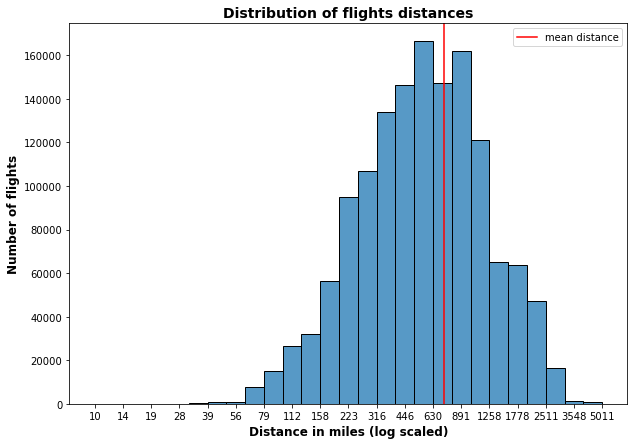

In [69]:
# x-axis log transformation funciton
def log_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.log10(x)
    else:
        return 10 ** x

# create figure
plt.figure(figsize=(10,7))

# Bin resizing, to transform the x-axis
bins = np.arange(1,log_trans(flights_opt_s['Distance'].max())+0.1, 0.1)

# Plot the scaled data
sb.histplot(flights_opt_s['Distance'].apply(log_trans),color=base_color,bins=bins)

# Identify the tick-locations
tick_locs = np.arange(1, log_trans(flights_opt_s['Distance'].max())+0.15, 0.15)

# Apply x-ticks
plt.xticks(tick_locs, log_trans(tick_locs, inverse = True).astype(int))


# Draw mean line
plt.axvline(x=log_trans(flights_opt_s.Distance.mean()), color='r', label='mean distance')

# axis lables
plt.xlabel('Distance in miles (log scaled)', weight='bold', size=12)
plt.ylabel('Number of flights', weight='bold', size=12)

# print title
plt.title('Distribution of flights distances', weight='bold', size=14)

# show legend
plt.legend();

As shown earlier, flights distances was showing right-skwed distribution with a lot of outliers. I have applied log transformation on x-axis and the distribution converted to normal-like distiribution.  
By this conversion, many statistic techniques can be applied.

## Bivariate Exploration

#### What is the relation between cancelled flights and distance? Are flights with longer distance more likely to be cancelled?

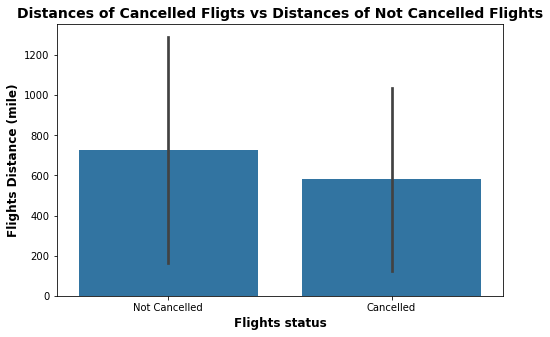

In [70]:
#figure size
plt.figure(figsize=(8,5))

# plot the mean flights distance showing the deviation around the mean for cancelled and not-cancelled flights
sb.barplot(data=flights_sample, x='Cancelled', y='Distance', color=base_color, ci='sd')

# x-axis parameters
plt.xlabel('Flights status', size=12, weight='bold')
plt.xticks([0,1], ['Not Cancelled', 'Cancelled'])

# y-axis label
plt.ylabel('Flights Distance (mile)', size=12, weight='bold')

# figure title
plt.title('Distances of Cancelled Fligts vs Distances of Not Cancelled Flights', size=14, weight='bold');

It is obvious that average distance of the not cancelled flights is higher (700 miles) than average distance of the cancelled flights (600 miles). The flights with more than 1000 distance is more likely to be not cancelled.

##### Which carrier has the most cancelling rate?

In [71]:
# calculate cancellation rate per Carrier
Carriers_cancel_rate = flights_sample.groupby('CarrierName')['Cancelled'].mean().reset_index()

# Sorting values in descending order
Carriers_cancel_rate.sort_values(by='Cancelled', ascending=False, ignore_index=True, inplace=True)

# rename column
Carriers_cancel_rate.rename(columns={'Cancelled': 'CancellationRate'}, inplace=True)

# convert to percent
Carriers_cancel_rate.CancellationRate = Carriers_cancel_rate.CancellationRate * 100

#print data
Carriers_cancel_rate

,CarrierName,CancellationRate
0,Envoy Air,3.950798
1,Mesa Airlines Inc.,3.723472
2,PSA Airlines Inc.,3.483540
3,Endeavor Air Inc.,2.907222
4,American Airlines Inc.,2.811148
5,ExpressJet Airlines Inc.,2.534856
6,ExpressJet Airlines LLC,2.405238
7,United Air Lines Inc.,2.350022
8,SkyWest Airlines Inc.,2.252669
9,JetBlue Airways,1.779628


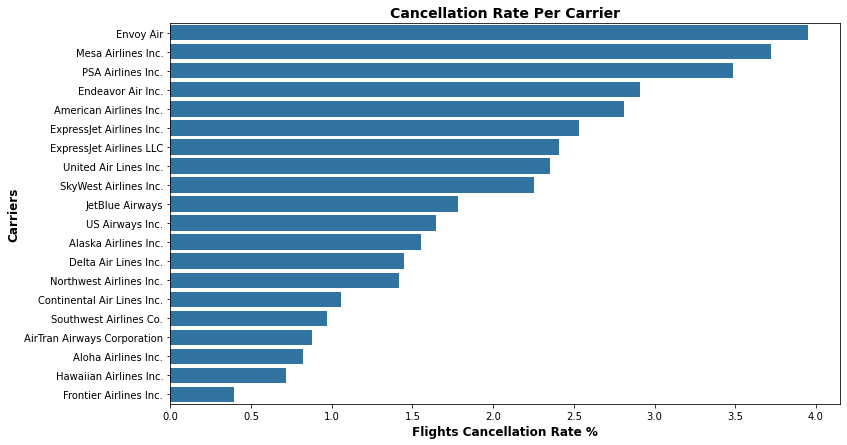

In [72]:
# set figure size
plt.figure(figsize=(12,7))

# plot a count plot
sb.barplot(
    data=Carriers_cancel_rate,
    x='CancellationRate',
    y='CarrierName', 
    color=base_color)

# x-axis parameters
plt.xlabel('Flights Cancellation Rate %', size=12, weight='bold')

# y-axis label
plt.ylabel('Carriers', size=12, weight='bold')

# figure title
plt.title('Cancellation Rate Per Carrier', size=14, weight='bold');

From above graph, **Envoy Air** occupies the first place in the list with 4 % cancellation rate followed by **Mesa Airlines Inc.** while **Frontier Airlines Inc.** comes at the end of the list.  

Let's get deep into cancelled flights and see most common cancellation reason for **Envoy Air** and **Mesa Airlines Inc.**

In [73]:
# Use group_by() and size() to get the number of flights and each combination of the two variable levels as a pandas Series
cc_counts = cancelled_flights_s.groupby(['CarrierName', 'CancellationCode']).size().reset_index(name='count')

In [74]:
# Use DataFrame.pivot() to rearrange the data, to have Carriers on rows
cc_counts = cc_counts.pivot(index = 'CarrierName', columns = 'CancellationCode', values = 'count')

# rename cancellation code columns to cancellation definition
cc_counts = cc_counts.rename(columns={'A':'Carrier', 'B':'Weather', 'C':'NAS', 'D':'Security'})

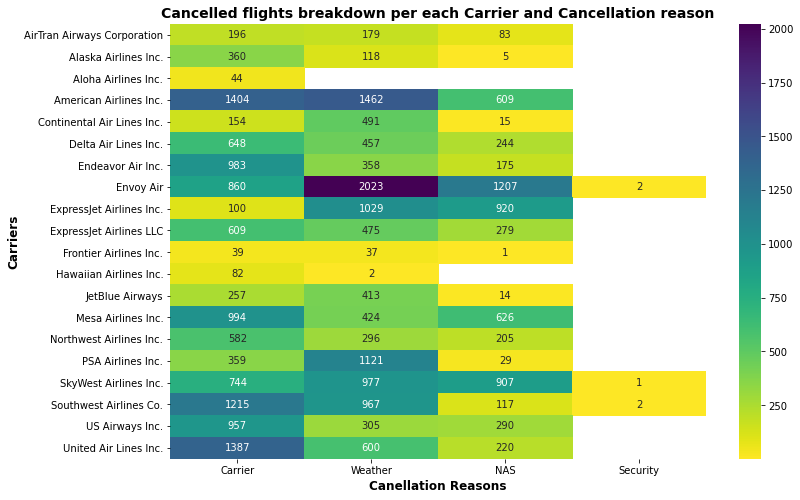

In [75]:
# plot a heat map showing Carriers vs reasons of flights cancellation
# figure size
plt.figure(figsize=(12,8))
sb.heatmap(cc_counts, annot = True, fmt = '.0f', cmap='viridis_r')

# x-axis label
plt.xlabel('Canellation Reasons', size=12, weight='bold')

# y-axis label
plt.ylabel('Carriers', size=12, weight='bold')

# figure title
plt.title('Cancelled flights breakdown per each Carrier and Cancellation reason', size=14, weight='bold');

Okay! so the common reason of cancelling **Envoy Air** flights was the **Weather** and not **Carrier** as I was expected. **American Airlines Inc.** comes after **Envoy Air** with the number of cancelled flights due to weather.  
While, **Mesa Airlines Inc.** cancelled flights was mainly beacuse of the **Carrier** itself.

##### Now, let's check linear correlation for the features of interest in non-cancelled and non-diverted sample

In [76]:
interest_col = ['ActualElapsedTime', 
                'CRSElapsedTime', 
                'AirTime', 
                'ArrDelay', 
                'DepDelay', 
                'Distance', 
                'CarrierDelay', 
                'WeatherDelay', 
                'NASDelay', 
                'SecurityDelay', 
                'LateAircraftDelay'  ]

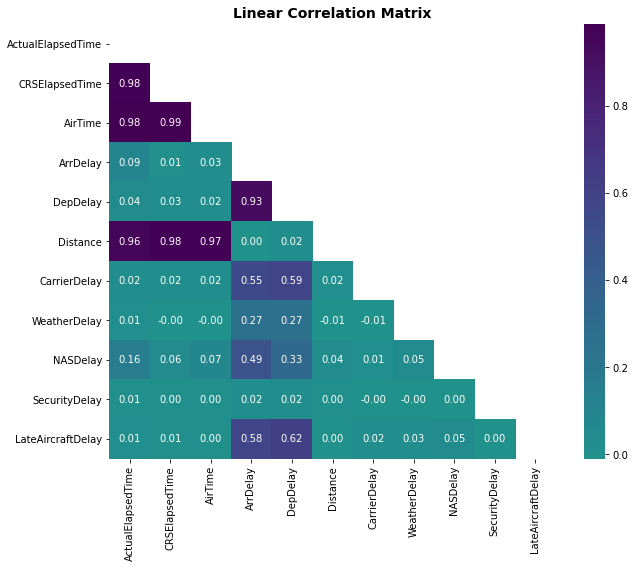

In [77]:
# plot a linear correlation matrix
# figure size
plt.figure(figsize= (10, 8))
# Mask to hide upper-right part of plot as it is a duplicate
mask = np.transpose(np.tril(np.ones(flights_opt_s[interest_col].corr().shape)))
sb.heatmap(flights_opt_s[interest_col].corr(), annot = True, center = 0, fmt = '.2f', cmap = 'viridis_r', mask = mask)
# figure title
plt.title('Linear Correlation Matrix', size=14, weight='bold');

1. `Distance` feature is positively high correlated with `ActualElapsedTime`, `CRSElapsedTime`, and `AirTime` features and those correlation are making sence as for longer distances, it is normal to have higher Elapsed/Air times.  

2. `DepDelay` is positively high correlated with `ArrDelay`.
3. `CarrierDelay` is positively correlated with `ArrDelay` and `DepDelay`.
4. `LateAircraftDelay` is positively correlated with `ArrDelay` and `DepDelay`.

##### Let's study the relations between features with high correlation factor

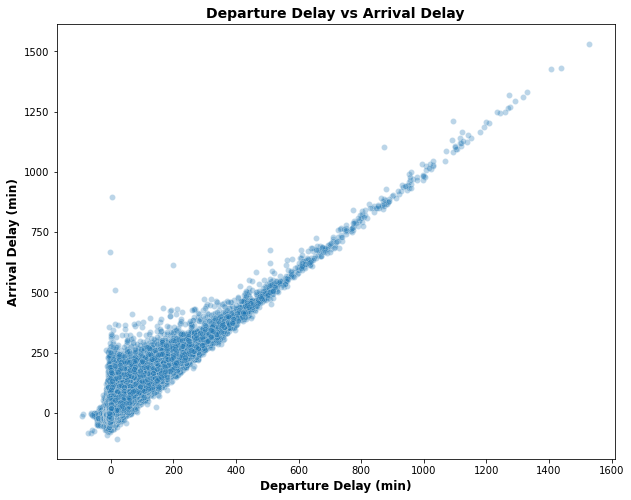

In [78]:
# Arrival delay vs Departure delay
# use scatter plot
plt.figure(figsize=(10,8))
sb.scatterplot(data=flights_opt_s, x='DepDelay', y='ArrDelay',alpha=3/10, x_jitter=0.02 )

# x-axis label
plt.xlabel('Departure Delay (min)', size=12, weight='bold')

# y-axis label
plt.ylabel('Arrival Delay (min)', size=12, weight='bold')

# figure title
plt.title('Departure Delay vs Arrival Delay', size=14, weight='bold');

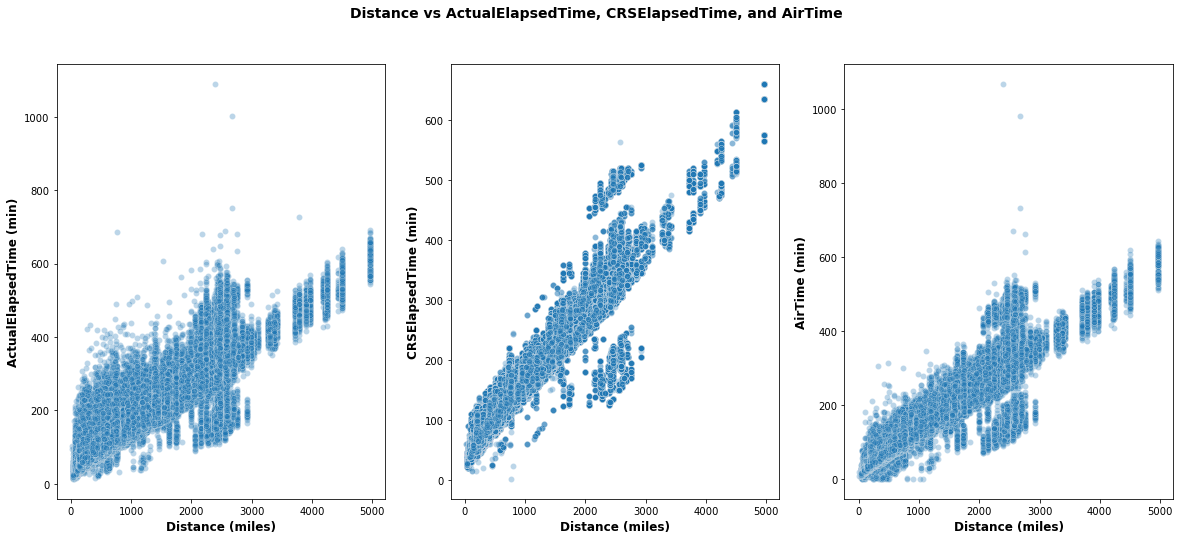

In [79]:
# Distance vs ActualElapsedTime, CRSElapsedTime, and AirTime
# use scatter plot
plt.figure(figsize=(20,8))

# vs ActualElapsedTime
plt.subplot(1,3,1)
sb.scatterplot(data=flights_opt_s, x='Distance', y='ActualElapsedTime',alpha=3/10, x_jitter=0.02 )

# axis labels
plt.xlabel('Distance (miles)', size=12, weight='bold')
plt.ylabel('ActualElapsedTime (min)', size=12, weight='bold')

# vs CRSElapsedTime
plt.subplot(1,3,2)
sb.scatterplot(data=flights_opt_s, x='Distance', y='CRSElapsedTime',alpha=3/10, x_jitter=0.02)

# axis labels
plt.xlabel('Distance (miles)', size=12, weight='bold')
plt.ylabel('CRSElapsedTime (min)', size=12, weight='bold')

# vs AirTime
plt.subplot(1,3,3)
sb.scatterplot(data=flights_opt_s, x='Distance', y='AirTime',alpha=3/10, x_jitter=0.02)

# axis labels
plt.xlabel('Distance (miles)', size=12, weight='bold')
plt.ylabel('AirTime (min)', size=12, weight='bold')

# figure title
plt.suptitle('Distance vs ActualElapsedTime, CRSElapsedTime, and AirTime', size=14, weight='bold');


From above charts, it is obvious there is a linear relationship between distance and Airtime/elapsed time with higher variations in time for the flights below 3000 miles

##### Out of curiosity, I want to check if Departure Delay is varying from month to month of the year.

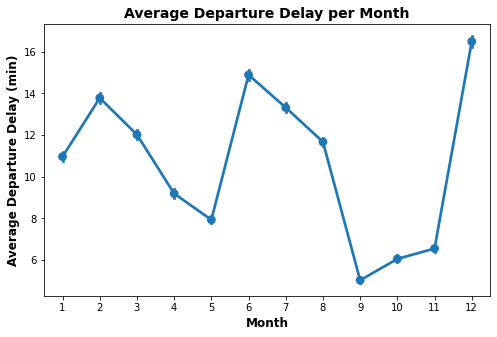

In [80]:
# Plot a point plot showing Departure Delay average per each month
plt.figure(figsize=(8,5))
sb.pointplot(data=flights_opt_s, x='Month', y='DepDelay', color=base_color)

# axis labels
plt.xlabel('Month', size=12, weight='bold')
plt.ylabel('Average Departure Delay (min)', size=12, weight='bold')
#figure title
plt.title('Average Departure Delay per Month', size=14, weight='bold');

From above graph, it is obvious that the highest average departure delay is encountered during December

## Multivariate Exploration

#### First, Let's investigate more about Weather delays as a main reason for cancelling flights of Envoy Airlines & American Airlines

I will check destinations that have high number of cancelled flights due to Weather

In [81]:
# filter cancelled flights due to Weather
cancelled_flights_s_weather = cancelled_flights_s.query('CancellationCode == "B"')

In [82]:
# Use group_by() and size() to get the number of flights and each combination of the two variable levels as a pandas Series
co_counts = cancelled_flights_s_weather.groupby(['CarrierName', 'Dest']).size().reset_index(name='count')

In [83]:
# Use DataFrame.pivot() to rearrange the data, to have Carriers on rows
co_counts = co_counts.pivot(index = 'CarrierName', columns = 'Dest', values = 'count')
co_counts.shape

(19, 264)

In [84]:
# In this cell, I will apply a filter to reduce the number of columns (Destinations) for better view
# tune a thershold that minimize the number of columns and give enough informative graph
thershold = 40 # maximum number of cancelled flights in a specific Destination is less than 40
for col in co_counts.columns:
    if co_counts[col].max() < thershold:
        co_counts.drop(columns=col, inplace=True)
co_counts.shape

(19, 27)

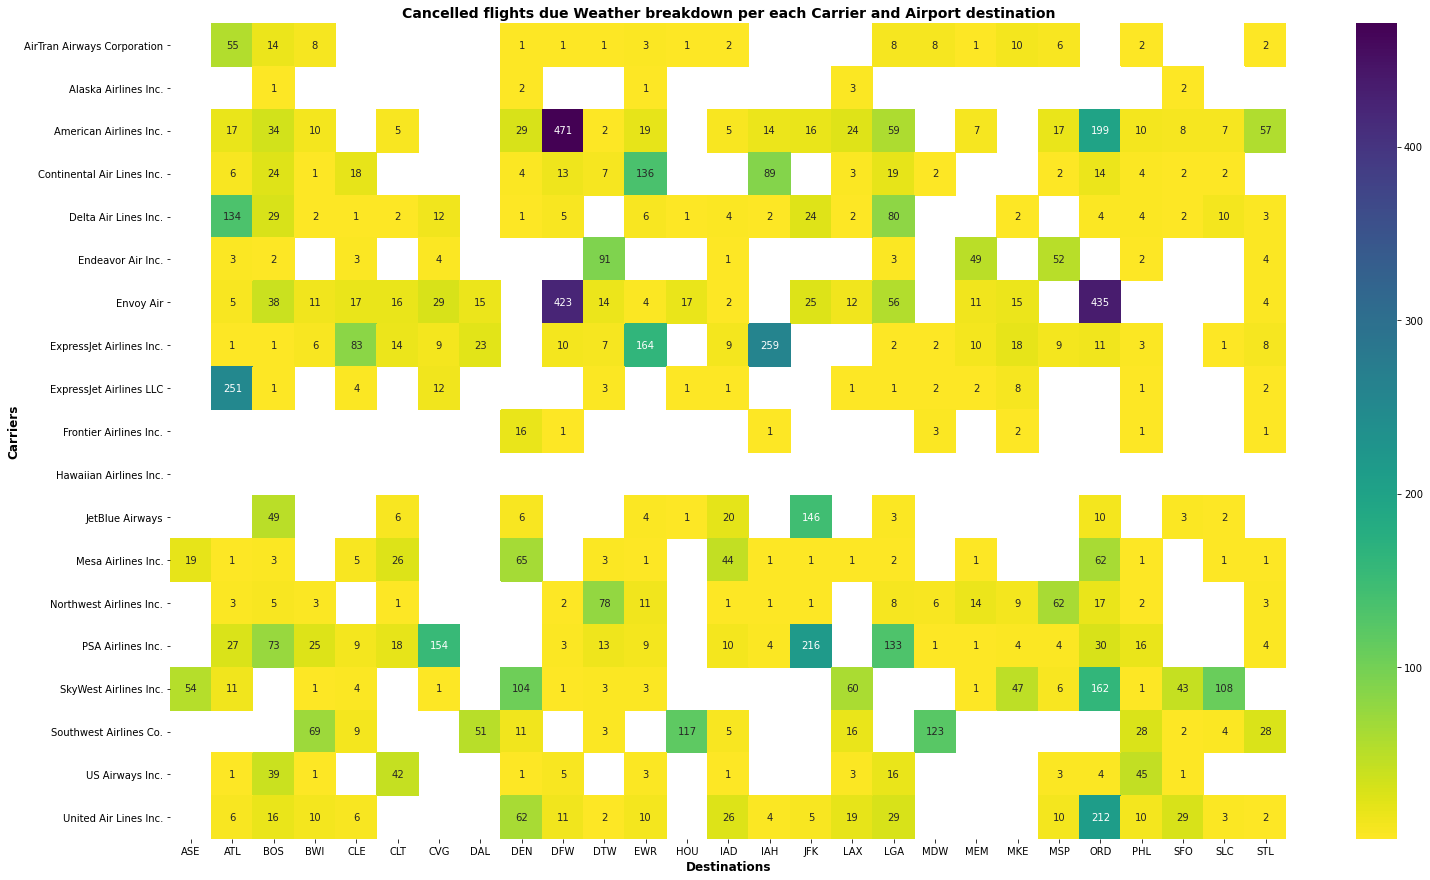

In [85]:
# plot a heat map for carriers vs Airport destinations for cancelled flights due to Weather
# figure size
plt.figure(figsize=(25,15))
sb.heatmap(co_counts, annot = True, fmt = '.0f', cmap='viridis_r')

# x-axis label
plt.xlabel('Destinations', size=12, weight='bold')

# y-axis label
plt.ylabel('Carriers', size=12, weight='bold')

# figure title
plt.title('Cancelled flights due Weather breakdown per each Carrier and Airport destination', size=14, weight='bold');

It is obvious that the highest number of cancelled flights of Envoy Airlines & American Airlines is correlated with flights destined to **DFW (Dallas/Fort Worth International)** and **ORD (O'Hare International Airport)**.

**Is it correlated with the Month of year?**

In [86]:
# filter cancelled flights destined to DFW or ORD
dfw_ord_canc = cancelled_flights_s_weather.query('Dest == "DFW" | Dest =="ORD"')

In [87]:
# groupby Month and Carrier
dfw_ord_canc = dfw_ord_canc.groupby(['Year','Month', 'CarrierName']).size().reset_index(name='count')

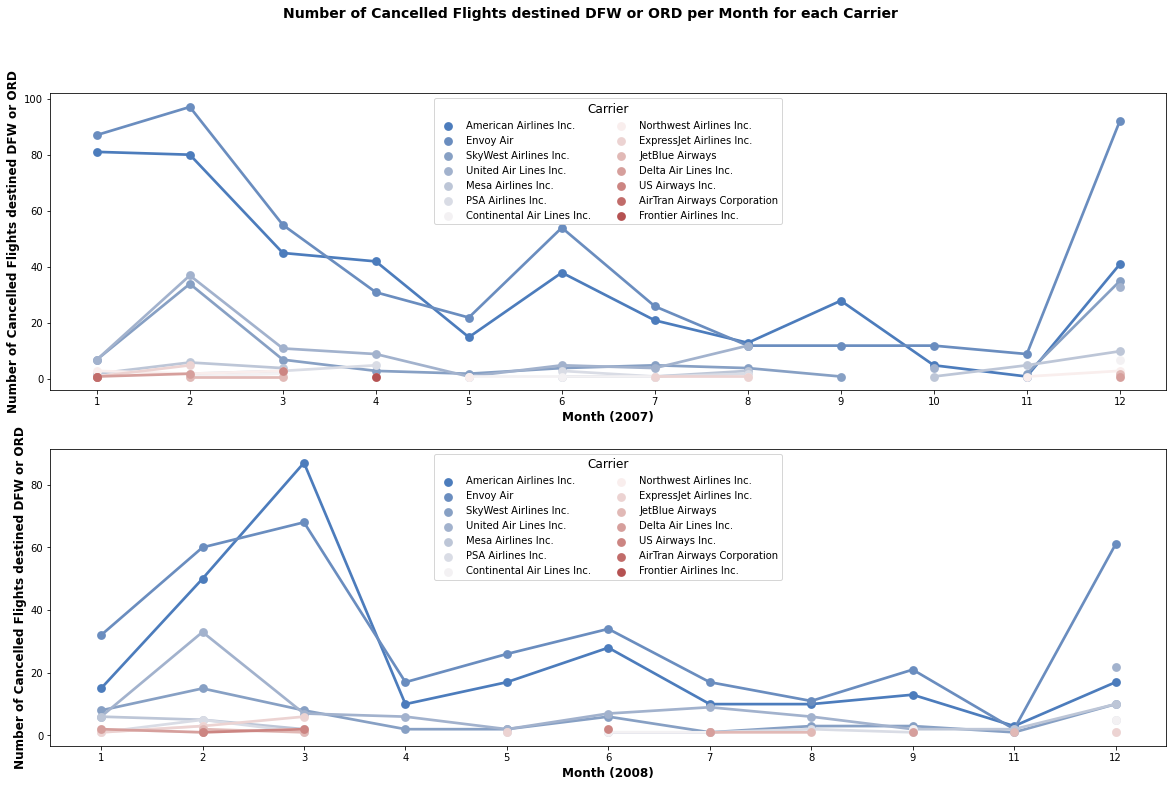

In [88]:
# plot a point plot showing counts of cancelled flights per Month for each Carrier 
plt.figure(figsize=(20,12))

# 2007
plt.subplot(2,1,1)
sb.pointplot(data=dfw_ord_canc.query('Year == 2007'), 
             x='Month', 
             y='count', 
             hue='CarrierName', 
             palette='vlag', 
             hue_order=dfw_ord_canc.CarrierName.value_counts().index)

# x-axis label
plt.xlabel('Month (2007)', size=12, weight='bold')

# y-axis label
plt.ylabel('Number of Cancelled Flights destined DFW or ORD', size=12, weight='bold')

# legend
plt.legend(loc=0, ncol=2, title='Carrier',title_fontsize=12, fontsize=10);

# 2008
plt.subplot(2,1,2)
sb.pointplot(data=dfw_ord_canc.query('Year == 2008'), 
             x='Month', 
             y='count', 
             hue='CarrierName', 
             palette='vlag', 
             hue_order=dfw_ord_canc.CarrierName.value_counts().index)

# x-axis label
plt.xlabel('Month (2008)', size=12, weight='bold')

# y-axis label
plt.ylabel('Number of Cancelled Flights destined DFW or ORD', size=12, weight='bold')

# legend
plt.legend(loc=0, ncol=2, title='Carrier',title_fontsize=12, fontsize=10);


# figure title
plt.suptitle('Number of Cancelled Flights destined DFW or ORD per Month for each Carrier', size=14, weight='bold');



The highest numbers of cancelled flights for Envoy Air and Amreican Airlines (destined DFW or ORD) can be seen during the winter season (December to March) 

In [89]:
# copy to csv file the sample data to be used in the presentation
flights_sample.to_csv('flights_sample_for_presentation.csv', index=False)